# NeuNetsのモデル表示

In [ ]:
!pip install pydot==1.2.3

In [ ]:
!pip install pyparsing==2.2.0

In [ ]:
!pip install h5py==2.8.0

In [ ]:
!conda install graphviz -y

In [1]:
from keras.models import load_model
model = load_model('keras_model.hdf5')

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
import numpy as np
x = x_test/255.0
mean = np.mean(x)
std = np.std(x)
x = (x - mean)/std
yt = y_test.ravel()
predict = model.predict(x)
yp = np.argmax(predict, axis=1).ravel()

In [14]:
from sklearn.metrics import accuracy_score
print('accuracy:', accuracy_score(yt, yp))

accuracy: 0.9209


In [4]:
from sklearn.metrics import classification_report
print(classification_report(yt, yp))

             precision    recall  f1-score   support

          0       0.94      0.92      0.93      1000
          1       0.97      0.96      0.97      1000
          2       0.87      0.92      0.89      1000
          3       0.81      0.87      0.84      1000
          4       0.94      0.93      0.93      1000
          5       0.91      0.83      0.87      1000
          6       0.93      0.94      0.94      1000
          7       0.96      0.94      0.95      1000
          8       0.97      0.94      0.95      1000
          9       0.93      0.97      0.95      1000

avg / total       0.92      0.92      0.92     10000



In [5]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(yt, yp)
print(matrix)

[[915   7  35   9   4   1   4   1  11  13]
 [  2 959   0   1   0   0   1   0   1  36]
 [ 12   0 920  21   9  11  18   6   3   0]
 [  5   0  23 871  14  48  23   7   5   4]
 [  2   0  25  17 925   7  11  11   0   2]
 [  0   1  14 115  17 829  10  11   0   3]
 [  2   0  22  22   1   3 945   2   1   2]
 [  6   0  11  14  10  12   3 941   0   3]
 [ 27   5   9   3   0   0   4   0 937  15]
 [  7  13   2   2   1   0   2   1   5 967]]


In [ ]:
import numpy as np
cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])

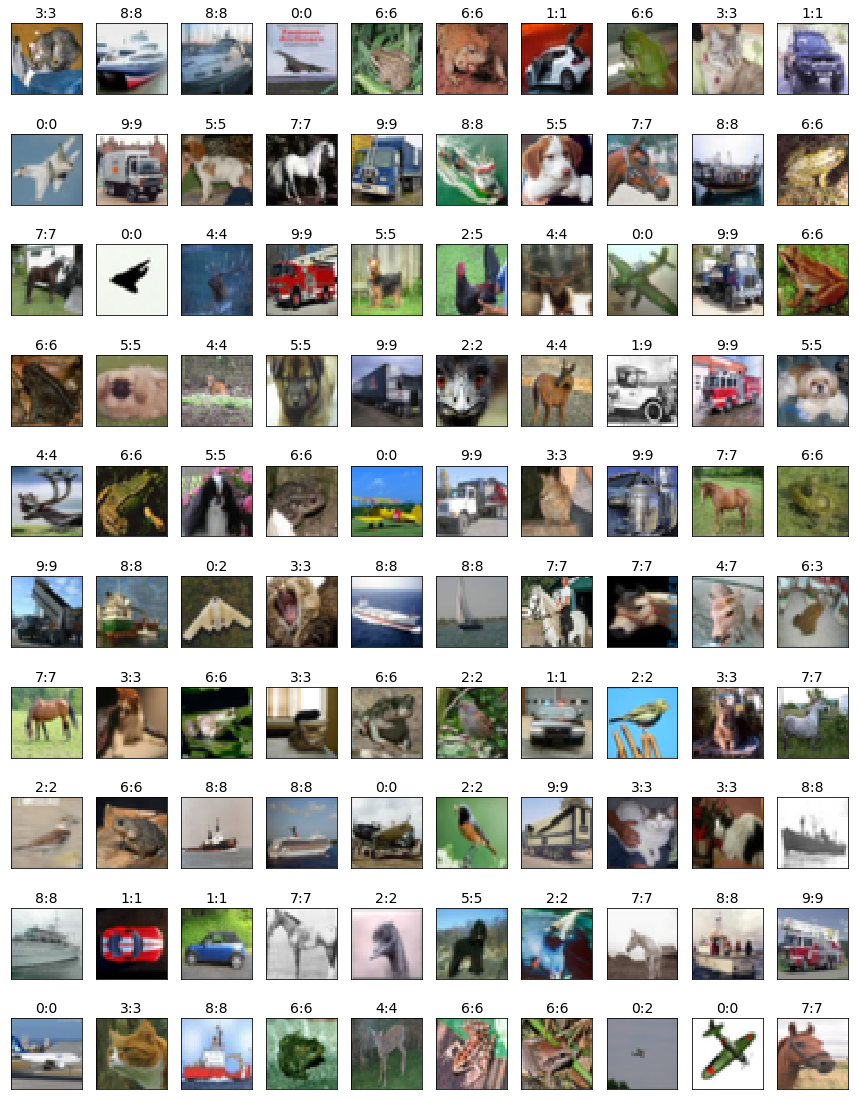

In [11]:
# データ内容の確認
import matplotlib.pyplot as plt
N = 100
indexes = range(N)

# x_orgの選択結果表示 (白黒反転)
x_selected = x_test[indexes]
y_selected = yt[indexes]

# 予測値の計算
yp_test = yp[indexes]

# グラフ表示
plt.figure(figsize=(15, 20))
for i in range(N):
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(x_selected[i])
    ax.set_title('%d:%d' % (y_selected[i], yp_test[i]),fontsize=14 )
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
from keras.utils import plot_model
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
plot_model(model, to_file='neunets-model.png', show_shapes=True, show_layer_names=True)

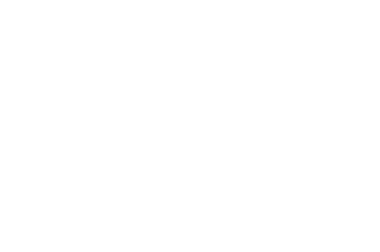

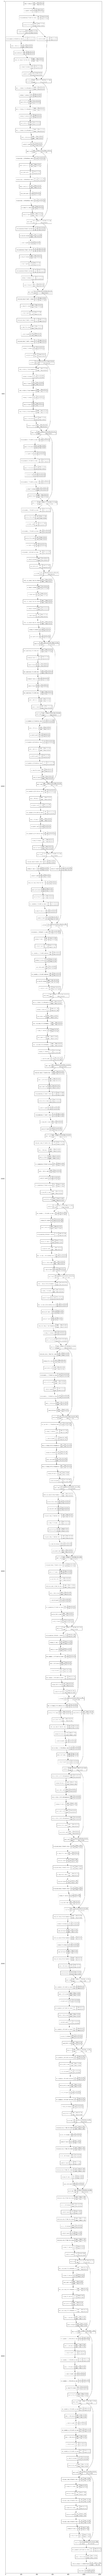

In [13]:
im = Image.open('neunets-model.png')
plt.axis('off')
plt.figure(figsize=(20,400))
plt.imshow(np.array(im))
plt.show()

In [ ]:
# サマリーコード
import numpy as np
from keras.models import load_model
model = load_model('keras_model.hdf5')
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x = x_test/255.0
mean = np.mean(x)
std = np.std(x)
x = (x - mean)/std
yt = y_test.ravel()
predict = model.predict(x)
yp = np.argmax(predict, axis=1).ravel()
from sklearn.metrics import classification_report
print(classification_report(yt, yp))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(yt, yp))